In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [32]:
#initialize the values
N = 50
D = 1
dx = 1/N
w = 1.9
e = 10**(-5)
eta = 2
max_iter = int((N*N)/2)

In [33]:
def init_MC(N):
    '''
    Initialize a grid with all zeros
    Args:
        -N the size of the grid
    Out: the initial state of the grid
    '''
    grid = np.zeros((N,N))
    return grid

grid = init_MC(N)

In [34]:
def neighbours_MC(current_pos, grid, neighbours, seed):
    '''
    Neighbours_MC: updates a list of neighbours when 'current_pos' is part of the new seed. 
    Args:
        - current_pos, the current position of the random walker within the grid
        - grid, the grid
        - neighbours, a list with all the neighbouring cell of the previous growth
        - seed, a list of all cell within the growth
    Out:
        -neighbours, the update list of all the neighbouring cell of the current growth
    '''
    neighbour_candidates = np.array([seed[0]])
    for i in [-1, 1]:
        if current_pos[0] + i >0 or current_pos[0] + i < len(grid):
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0]+i, current_pos[1]]])
        if current_pos[1]+i == len(grid):
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], 0]])
        elif current_pos[1]+i == -1:
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], len(grid)-1]])
        else:
            neighbour_candidates = np.vstack([neighbour_candidates, [current_pos[0], current_pos[1]+i]])
    clear = True
    for n in range(1,len(neighbour_candidates)):
        for s in seed:
            if (neighbour_candidates[n]==s).all():
                clear = False
        for ne in neighbours:
            if (neighbour_candidates[n]==ne).all():
                clear = False
        if clear == True:
            neighbours = np.vstack([neighbours, neighbour_candidates[n]])
        else:
            clear = True
    return neighbours

In [35]:
def random_walker(grid, seed, neighbours, max_iter, p_s = 2):
    '''
    random_walker: Monte Carlo random walker DLA
    Args:
     - grid, the current grid 
     - seed, list with all the coordinates of cell within the growth
     - nieghbours, list coordinates of all cell neighbouring thw growth
     - max_iter, the maximum amount of iterations
     - p_s, sticking probability
     Out:
     - grid, the final grid including the growth
    
    '''
    
    current_pos = [0, random.randint(0, len(grid)-1)]
    seed_conflict = False
    for i in range(max_iter):
        move_dir = random.randint(0, 4)
        if move_dir == 0:
            new_pos = [current_pos[0]-1, current_pos[1]]
        elif move_dir == 1:
            new_pos = [current_pos[0]+1, current_pos[1]]
        elif move_dir == 2:
            new_pos = [current_pos[0], current_pos[1]+1]
        elif move_dir == 3:
            new_pos = [current_pos[0], current_pos[1]-1]
        if new_pos[0] < 0 or new_pos[0] >= len(grid):
            continue
        elif new_pos[1] < 0 or new_pos[1]>len(grid):
            current_pos = [new_pos[0],new_pos[1]%len(grid)]
        else:
            current_pos = new_pos
        for s in seed:
            if (new_pos == s).all():
                seed_conflict = True
        if seed_conflict:
            break
        for j in range(len(neighbours)):
            new_neighbours = neighbours
            if (neighbours[j] == current_pos).all():
                new_s = neighbours[j]
                rand = random.random()
                if rand < p_s:
                    seed = np.vstack([seed, new_s])
                    grid[new_s[0], new_s[1]] = 1
                    neighbours = np.delete(neighbours, j, axis = 0)
                    neighbours = neighbours_MC(current_pos, grid, neighbours, seed)
                    current_pos = [0, random.randint(0, len(grid)-1)]
                break
        # stopping condition for when our seed reaches the top of the grid
        for s in seed:
            if s[0]==0:
                break
        else:
            continue
        break
    return(grid)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


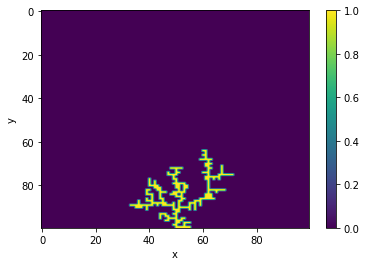

In [27]:
Y = np.copy(grid)
seed = np.array([[N-1,round((N-1)/2)]])
Y[seed[0, 0],seed[0, 1]] = 1
neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
Y = random_walker(Y, seed, neighbours, 50000000)
plt.imshow(Y,aspect='auto', cmap='viridis',vmin=0, vmax=1)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


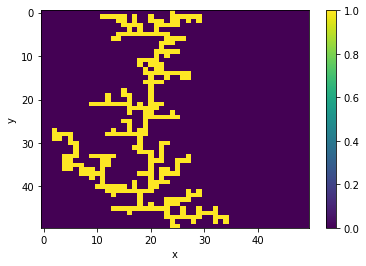

In [37]:
Y = np.copy(grid)
seed = np.array([[N-1,round((N-1)/2)]])
Y[seed[0, 0],seed[0, 1]] = 1
neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
Y = random_walker(Y, seed, neighbours, 50000000)
plt.imshow(Y,aspect='auto', cmap='viridis',vmin=0, vmax=1)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()


C

True


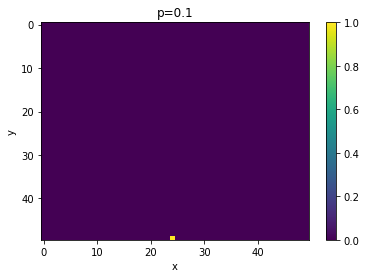

True
True


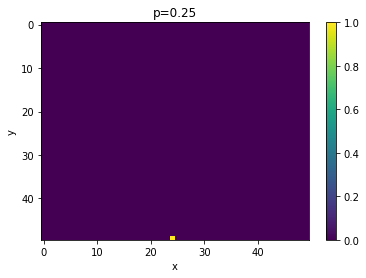

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


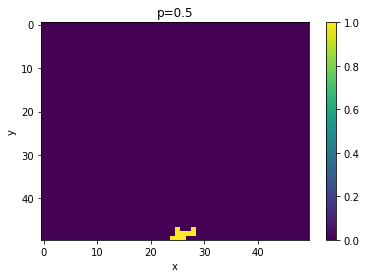

True
True
True
True
True


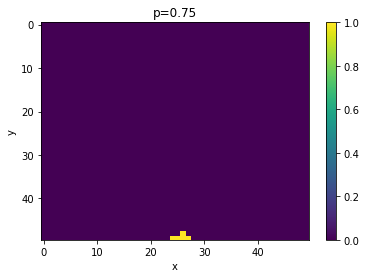

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


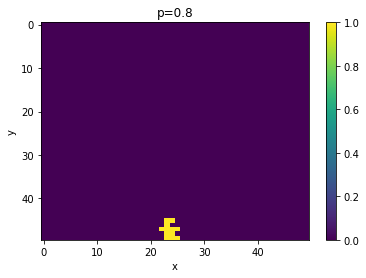

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


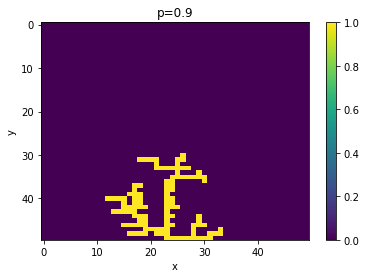

In [41]:
P_s = [0.1,0.25,0.5,0.75,0.80,0.9]

for p in P_s:
    Y = np.copy(grid)
    seed = np.array([[N-1,round((N-1)/2)]])
    Y[seed[0, 0],seed[0, 1]] = 1
    neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
    Y = random_walker(Y, seed, neighbours, 50000000, p)
    plt.imshow(Y,aspect='auto', cmap='viridis',vmin=0, vmax=1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("p={}".format(p))
    plt.colorbar()
    plt.show()